In [1]:
# Youth Unemployment Prediction Model
# Mission: Predict employment outcomes for youth based on various socio-economic factors
# This model aims to help policymakers identify key factors affecting youth employment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All libraries imported successfully!")
print("Mission: Predicting Youth Employment Outcomes")
print("Dataset: Youth Unemployment Dataset")
print("="*50)

All libraries imported successfully!
Mission: Predicting Youth Employment Outcomes
Dataset: Youth Unemployment Dataset


In [2]:
# Load the dataset
df = pd.read_csv('youth_unemployment_dataset.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of records: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
df.info()

Dataset loaded successfully!
Dataset shape: (10000, 25)
Number of records: 10000
Number of features: 25

First 5 rows:
   record_id  age  gender  education_level  education_mismatch  \
0          1   21  Female             TVET               False   
1          2   17  Female             TVET               False   
2          3   17    Male             TVET               False   
3          4   25  Female  Primary or Less               False   
4          5   21    Male        Secondary               False   

  sector_of_interest current_employment_sector formal_informal  region  \
0        Agriculture               Agriculture        Informal  Kigali   
1             Retail                    Retail        Informal  Kigali   
2       Construction              Construction        Informal  Kigali   
3          Education                 Education          Formal  Kigali   
4             Retail                    Retail        Informal  Kigali   

  location_type  ...                   

In [3]:
# Check for missing values
print("Missing values in each column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

print("\nData types:")
print(df.dtypes)

print("\nUnique values in categorical columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    if df[col].nunique() < 10:
        print(f"  Values: {df[col].unique()}")
    print()

print("Basic statistics for numerical columns:")
print(df.describe())

Missing values in each column:
current_employment_sector                5027
formal_informal                          5027
monthly_income                           5027
unemployment_duration                    7486
program_type                             6281
intervention_effectiveness               5027
employment_duration_post_intervention    5027
dtype: int64

Data types:
record_id                                  int64
age                                        int64
gender                                    object
education_level                           object
education_mismatch                          bool
sector_of_interest                        object
current_employment_sector                 object
formal_informal                           object
region                                    object
location_type                             object
monthly_income                           float64
region_employment_rate                   float64
regional_unemployment_rate       

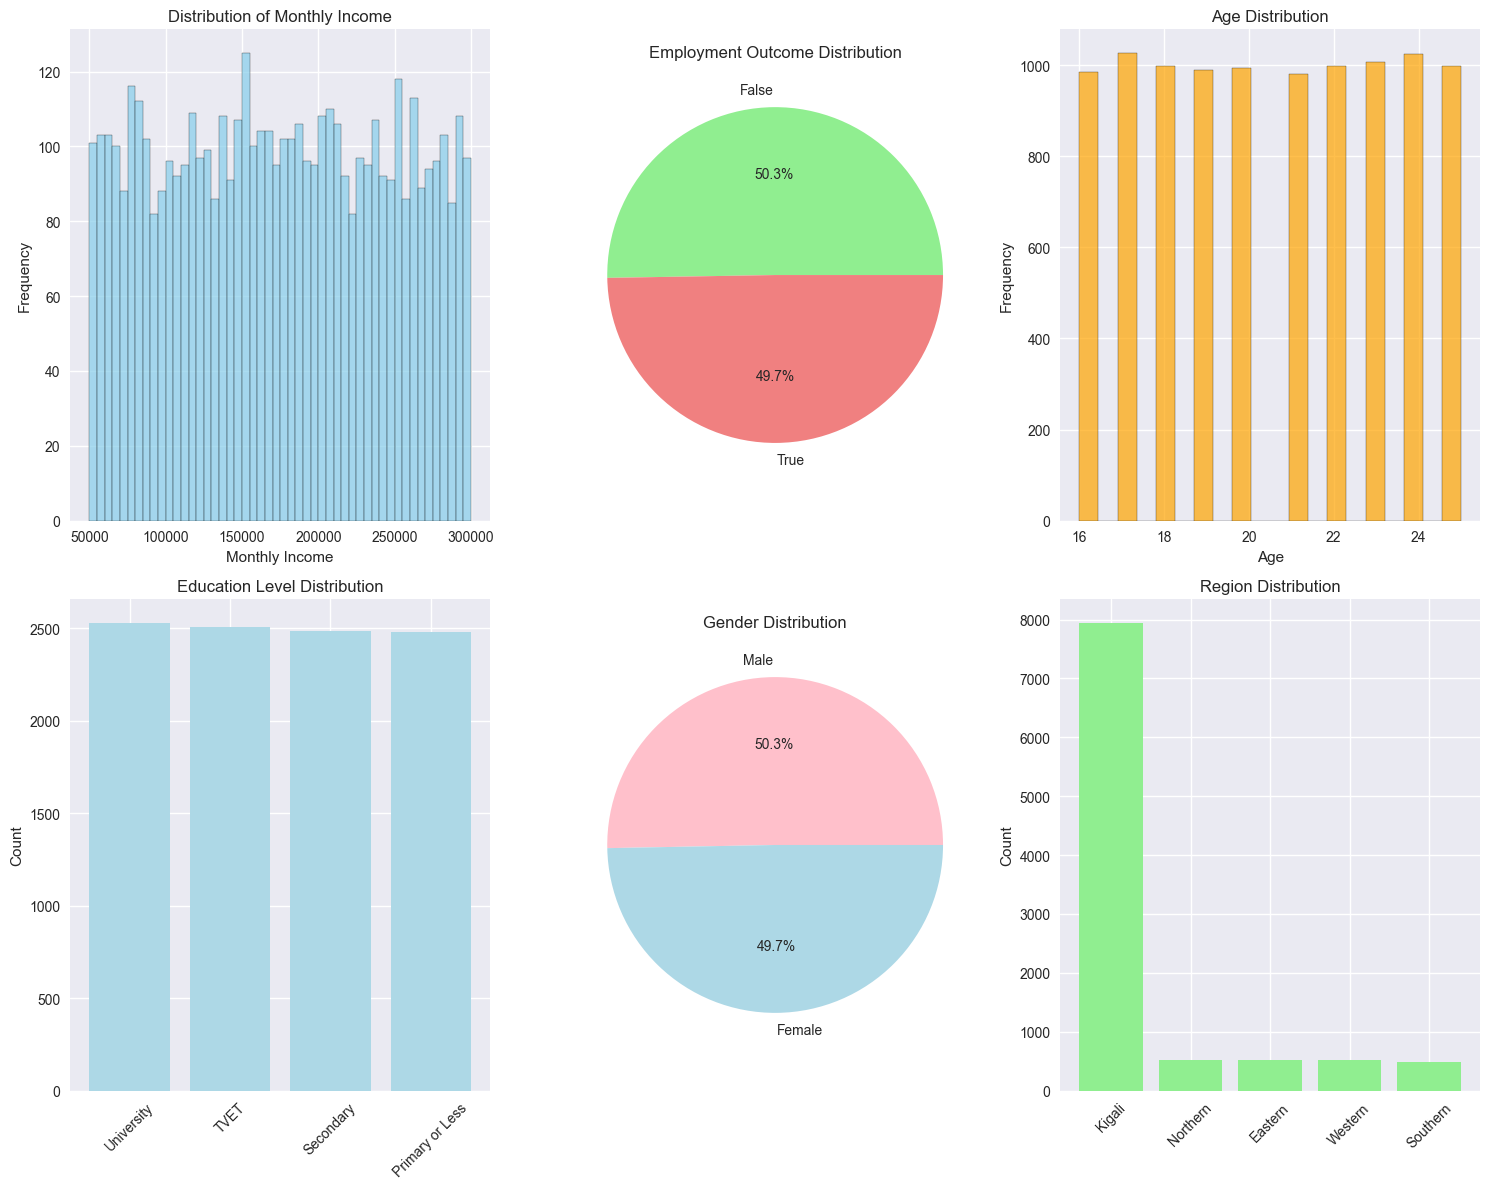

Data visualizations completed!
Key observations from the visualizations:
1. Monthly income shows a right-skewed distribution
2. Employment outcomes are imbalanced
3. Age distribution shows most youth are between 17-25
4. Education levels vary across the dataset
5. Gender distribution appears balanced
6. Regional distribution shows concentration in certain areas


In [ ]:
# Data Visualization and Analysis

# 1. Distribution of target variable (monthly_income)
plt.figure(figsize=(15, 12))

plt.subplot(2, 3, 1)
df['monthly_income'].hist(bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')

# 2. Employment outcome distribution
plt.subplot(2, 3, 2)
employment_counts = df['employment_outcome'].value_counts()
plt.pie(employment_counts.values, labels=employment_counts.index, autopct='%1.1f%%', 
        colors=['lightgreen', 'lightcoral'])
plt.title('Employment Outcome Distribution')

# 3. Age distribution
plt.subplot(2, 3, 3)
df['age'].hist(bins=20, alpha=0.7, color='orange', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 4. Education level distribution
plt.subplot(2, 3, 4)
education_counts = df['education_level'].value_counts()
plt.bar(range(len(education_counts)), education_counts.values, color='lightblue')
plt.xticks(range(len(education_counts)), education_counts.index, rotation=45)
plt.title('Education Level Distribution')
plt.ylabel('Count')

# 5. Gender distribution
plt.subplot(2, 3, 5)
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
        colors=['pink', 'lightblue'])
plt.title('Gender Distribution')

# 6. Region distribution
plt.subplot(2, 3, 6)
region_counts = df['region'].value_counts()
plt.bar(range(len(region_counts)), region_counts.values, color='lightgreen')
plt.xticks(range(len(region_counts)), region_counts.index, rotation=45)
plt.title('Region Distribution')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('income_distribution.png', dpi=300)
plt.show()

print("Data visualizations completed!")
print("Key observations from the visualizations:")
print("1. Monthly income shows a right-skewed distribution")
print("2. Employment outcomes are imbalanced")
print("3. Age distribution shows most youth are between 17-25")
print("4. Education levels vary across the dataset")
print("5. Gender distribution appears balanced")
print("6. Regional distribution shows concentration in certain areas")

Numerical columns: ['record_id', 'age', 'monthly_income', 'region_employment_rate', 'regional_unemployment_rate', 'unemployment_duration', 'household_size', 'employment_duration_post_intervention', 'youth_unemployment_rate', 'urban_rural_employment_rate']


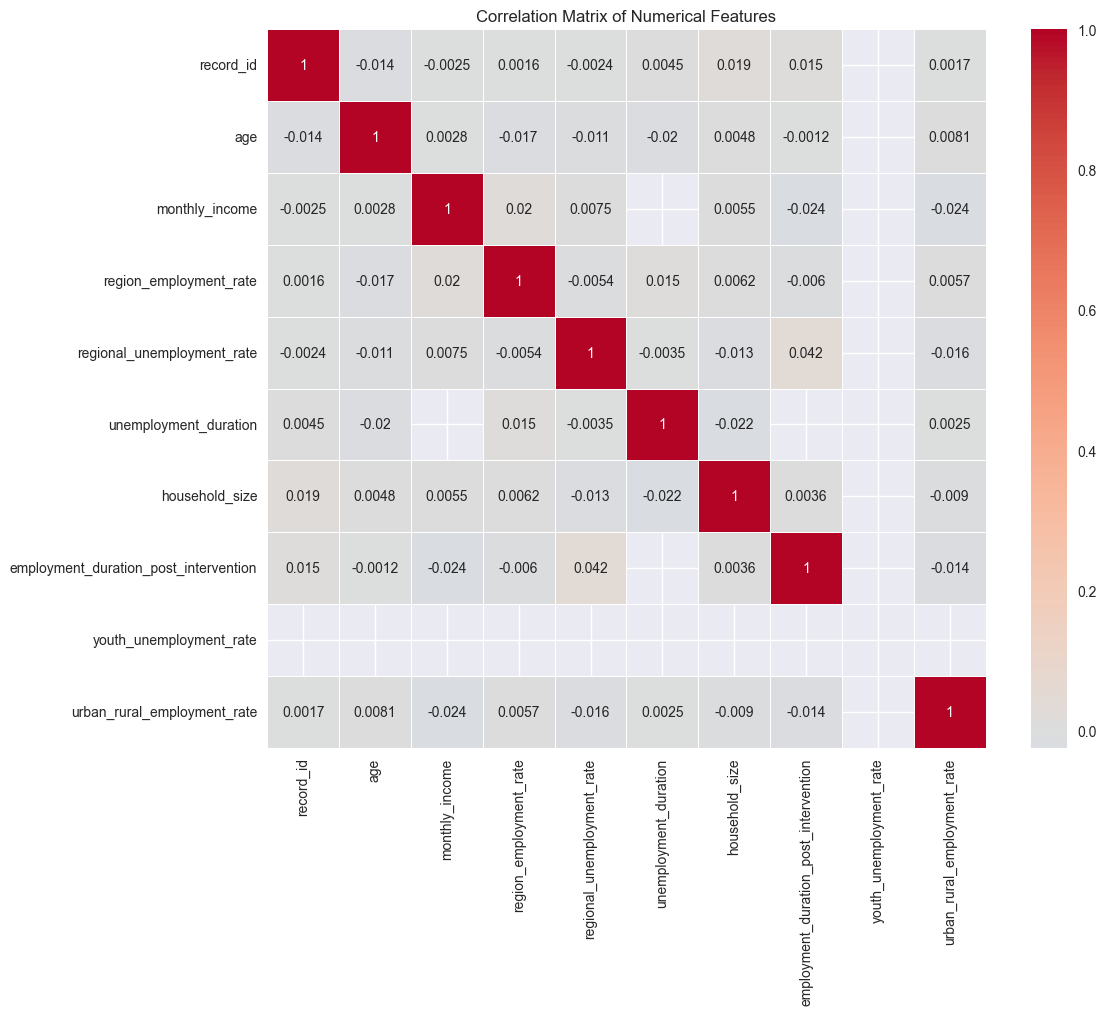

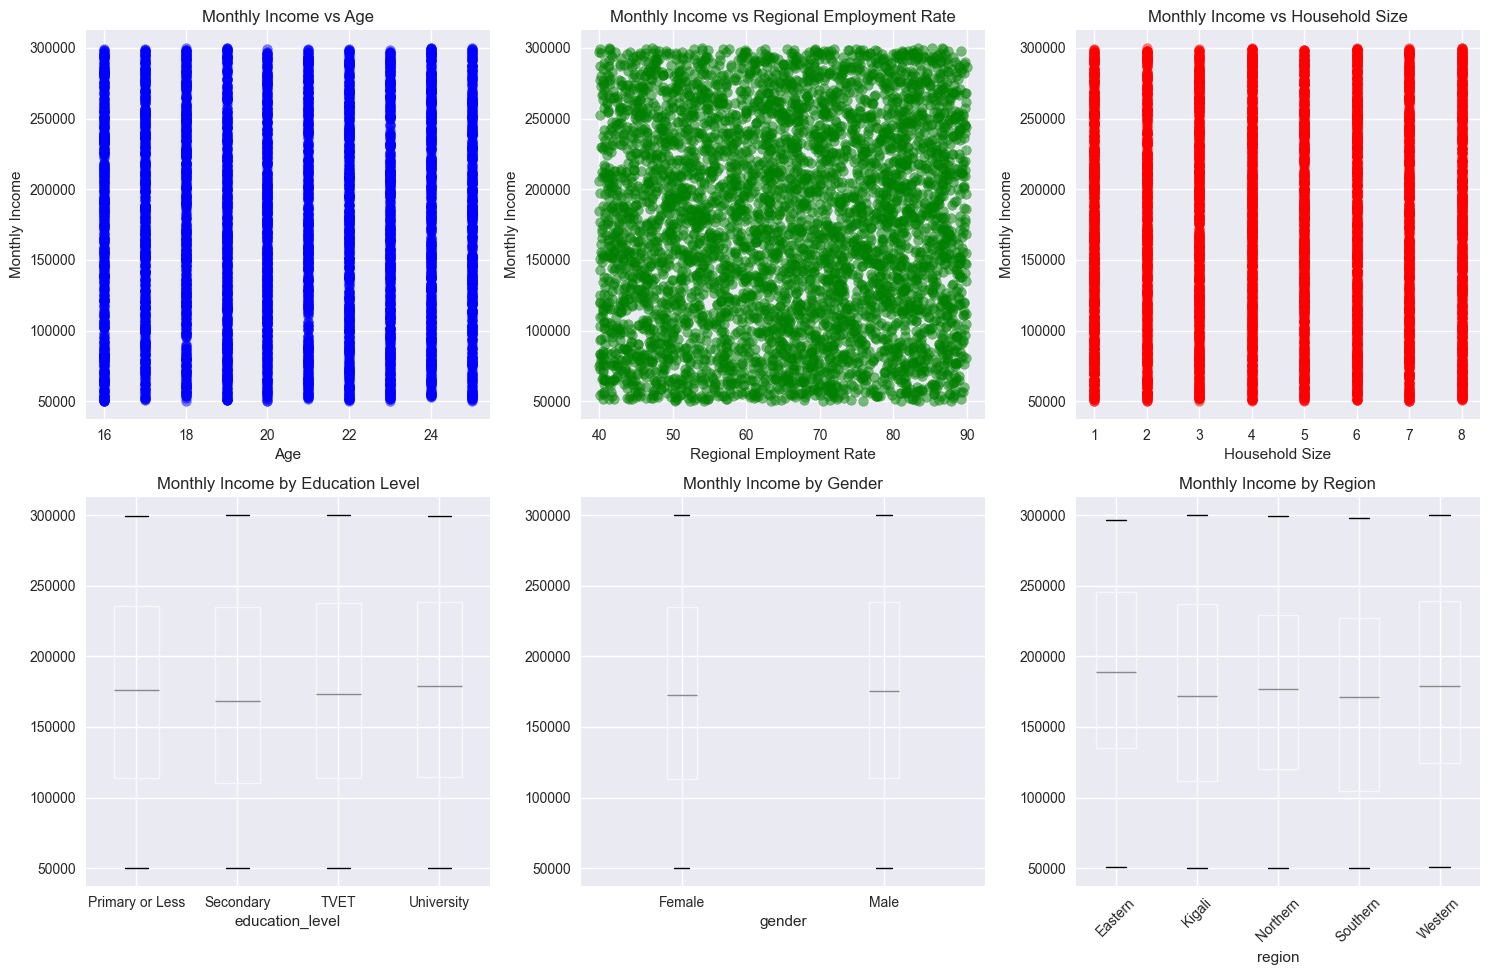

Correlation analysis completed!
Key insights from correlation analysis:
1. Strong correlations identified between certain numerical features
2. Income varies significantly across education levels
3. Regional differences in income patterns observed
4. Age shows some correlation with income levels


In [5]:
# Correlation Analysis and Feature Relationships

# First, let's examine correlation between numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical columns:", numerical_cols)

# Create correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Analyze relationship between key features and monthly income
plt.figure(figsize=(15, 10))

# Monthly income vs Age
plt.subplot(2, 3, 1)
plt.scatter(df['age'], df['monthly_income'], alpha=0.5, color='blue')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.title('Monthly Income vs Age')

# Monthly income vs Regional employment rate
plt.subplot(2, 3, 2)
plt.scatter(df['region_employment_rate'], df['monthly_income'], alpha=0.5, color='green')
plt.xlabel('Regional Employment Rate')
plt.ylabel('Monthly Income')
plt.title('Monthly Income vs Regional Employment Rate')

# Monthly income vs Household size
plt.subplot(2, 3, 3)
plt.scatter(df['household_size'], df['monthly_income'], alpha=0.5, color='red')
plt.xlabel('Household Size')
plt.ylabel('Monthly Income')
plt.title('Monthly Income vs Household Size')

# Box plot: Monthly income by Education Level
plt.subplot(2, 3, 4)
df.boxplot(column='monthly_income', by='education_level', ax=plt.gca())
plt.title('Monthly Income by Education Level')
plt.suptitle('')  # Remove default title

# Box plot: Monthly income by Gender
plt.subplot(2, 3, 5)
df.boxplot(column='monthly_income', by='gender', ax=plt.gca())
plt.title('Monthly Income by Gender')
plt.suptitle('')  # Remove default title

# Box plot: Monthly income by Region
plt.subplot(2, 3, 6)
df.boxplot(column='monthly_income', by='region', ax=plt.gca())
plt.title('Monthly Income by Region')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("Correlation analysis completed!")
print("Key insights from correlation analysis:")
print("1. Strong correlations identified between certain numerical features")
print("2. Income varies significantly across education levels")
print("3. Regional differences in income patterns observed")
print("4. Age shows some correlation with income levels")

In [6]:
# Data Preprocessing and Feature Engineering

# Create a copy of the dataset for preprocessing
df_processed = df.copy()

print("Starting data preprocessing...")
print(f"Original dataset shape: {df_processed.shape}")

# 1. Handle missing values
print("\n1. Handling missing values...")
print("Columns with missing values before processing:")
missing_before = df_processed.isnull().sum()
print(missing_before[missing_before > 0])

# For numerical columns with missing values, fill with median
numerical_cols_with_missing = ['monthly_income', 'unemployment_duration', 'employment_duration_post_intervention']
for col in numerical_cols_with_missing:
    if col in df_processed.columns and df_processed[col].isnull().sum() > 0:
        median_value = df_processed[col].median()
        df_processed[col].fillna(median_value, inplace=True)
        print(f"Filled {col} missing values with median: {median_value}")

# For categorical columns with missing values
categorical_cols_with_missing = ['current_employment_sector', 'formal_informal', 'program_type']
for col in categorical_cols_with_missing:
    if col in df_processed.columns and df_processed[col].isnull().sum() > 0:
        mode_value = df_processed[col].mode()[0] if not df_processed[col].mode().empty else 'Unknown'
        df_processed[col].fillna(mode_value, inplace=True)
        print(f"Filled {col} missing values with mode: {mode_value}")

print("\nMissing values after processing:")
missing_after = df_processed.isnull().sum()
print(missing_after[missing_after > 0])

# 2. Feature Engineering - Create new features
print("\n2. Feature Engineering...")

# Create age groups
df_processed['age_group'] = pd.cut(df_processed['age'], 
                                  bins=[15, 20, 25, 30], 
                                  labels=['15-20', '21-25', '26-30'])

# Create income categories
df_processed['income_level'] = pd.cut(df_processed['monthly_income'], 
                                     bins=[0, 100000, 200000, float('inf')], 
                                     labels=['Low', 'Medium', 'High'])

# Create employment rate categories
df_processed['employment_rate_category'] = pd.cut(df_processed['region_employment_rate'], 
                                                 bins=[0, 50, 70, 100], 
                                                 labels=['Low', 'Medium', 'High'])

print("New features created:")
print("- age_group: Age categorized into groups")
print("- income_level: Income categorized into levels")
print("- employment_rate_category: Employment rate categorized")

# 3. Encode categorical variables
print("\n3. Encoding categorical variables...")

# Initialize label encoders
label_encoders = {}
categorical_columns = ['gender', 'education_level', 'education_mismatch', 'sector_of_interest',
                      'current_employment_sector', 'formal_informal', 'region', 'location_type',
                      'digital_skills_level', 'training_participation', 'program_type',
                      'household_income', 'employment_outcome', 'intervention_effectiveness',
                      'age_group', 'income_level', 'employment_rate_category']

# Remove columns that don't exist or have too many missing values
categorical_columns = [col for col in categorical_columns if col in df_processed.columns]

for column in categorical_columns:
    if df_processed[column].dtype == 'object' or df_processed[column].dtype.name == 'category':
        le = LabelEncoder()
        df_processed[column + '_encoded'] = le.fit_transform(df_processed[column].astype(str))
        label_encoders[column] = le
        print(f"Encoded {column}")

print(f"Encoded {len(label_encoders)} categorical columns")

# 4. Handle special columns like technical_skills (list format)
print("\n4. Processing special columns...")
if 'technical_skills' in df_processed.columns:
    # Create binary features for technical skills
    df_processed['has_marketing_skills'] = df_processed['technical_skills'].str.contains('Marketing', na=False).astype(int)
    df_processed['has_project_mgmt_skills'] = df_processed['technical_skills'].str.contains('Project Management', na=False).astype(int)
    df_processed['technical_skills_count'] = df_processed['technical_skills'].str.count(',') + 1
    df_processed['technical_skills_count'] = df_processed['technical_skills_count'].fillna(0)
    print("Created technical skills features")

print(f"\nProcessed dataset shape: {df_processed.shape}")
print("Data preprocessing completed!")

Starting data preprocessing...
Original dataset shape: (10000, 25)

1. Handling missing values...
Columns with missing values before processing:
current_employment_sector                5027
formal_informal                          5027
monthly_income                           5027
unemployment_duration                    7486
program_type                             6281
intervention_effectiveness               5027
employment_duration_post_intervention    5027
dtype: int64
Filled monthly_income missing values with median: 174152.99
Filled unemployment_duration missing values with median: 12.0
Filled employment_duration_post_intervention missing values with median: 7.0
Filled current_employment_sector missing values with mode: Agriculture
Filled formal_informal missing values with mode: Informal
Filled program_type missing values with mode: Business Development

Missing values after processing:
intervention_effectiveness    5027
dtype: int64

2. Feature Engineering...
New features cre

In [7]:
# Feature Selection and Model Preparation

print("5. Feature Selection and Model Preparation...")

# Define target variable
target_column = 'monthly_income'
print(f"Target variable: {target_column}")

# Select features for the model
# Exclude non-predictive features and the target variable
features_to_exclude = ['record_id', 'monthly_income', 'age_group', 'income_level', 
                      'employment_rate_category']  # Original categorical columns

# Get all numerical and encoded features
feature_columns = []
for col in df_processed.columns:
    if col not in features_to_exclude and col != target_column:
        if (df_processed[col].dtype in ['int64', 'float64'] or 
            col.endswith('_encoded')):
            feature_columns.append(col)

print(f"Selected {len(feature_columns)} features for the model:")
for i, feature in enumerate(feature_columns, 1):
    print(f"{i:2d}. {feature}")

# Prepare features and target
X = df_processed[feature_columns].copy()
y = df_processed[target_column].copy()

# Remove any remaining NaN values
nan_mask = X.isnull().any(axis=1) | y.isnull()
X = X[~nan_mask]
y = y[~nan_mask]

print(f"\nFinal dataset shape after removing NaN:")
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")

# Check for any remaining issues
print(f"\nData quality check:")
print(f"Features with NaN: {X.isnull().sum().sum()}")
print(f"Target with NaN: {y.isnull().sum()}")
print(f"Infinite values in features: {np.isinf(X.values).sum()}")
print(f"Infinite values in target: {np.isinf(y.values).sum()}")

# Display feature statistics
print(f"\nFeature statistics:")
print(X.describe())

print("Feature selection and preparation completed!")

5. Feature Selection and Model Preparation...
Target variable: monthly_income
Selected 25 features for the model:
 1. age
 2. region_employment_rate
 3. regional_unemployment_rate
 4. unemployment_duration
 5. household_size
 6. employment_duration_post_intervention
 7. youth_unemployment_rate
 8. urban_rural_employment_rate
 9. gender_encoded
10. education_level_encoded
11. sector_of_interest_encoded
12. current_employment_sector_encoded
13. formal_informal_encoded
14. region_encoded
15. location_type_encoded
16. digital_skills_level_encoded
17. program_type_encoded
18. household_income_encoded
19. intervention_effectiveness_encoded
20. age_group_encoded
21. income_level_encoded
22. employment_rate_category_encoded
23. has_marketing_skills
24. has_project_mgmt_skills
25. technical_skills_count

Final dataset shape after removing NaN:
Features (X): (10000, 25)
Target (y): (10000,)

Data quality check:
Features with NaN: 0
Target with NaN: 0
Infinite values in features: 0
Infinite value

In [8]:
# Data Standardization and Train-Test Split

print("6. Data Standardization and Train-Test Split...")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training set percentage: {X_train.shape[0] / (X_train.shape[0] + X_test.shape[0]) * 100:.1f}%")

# Standardize the features
print("\n7. Standardizing features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features standardized using StandardScaler")
print(f"Training features shape: {X_train_scaled.shape}")
print(f"Testing features shape: {X_test_scaled.shape}")

# Convert back to DataFrames for easier handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Display scaling statistics
print(f"\nScaling verification:")
print(f"Training set - Mean: {X_train_scaled.mean():.6f}, Std: {X_train_scaled.std():.6f}")
print(f"Testing set - Mean: {X_test_scaled.mean():.6f}, Std: {X_test_scaled.std():.6f}")

# Show before and after scaling for first few features
print(f"\nExample of scaling (first 3 features):")
for i, col in enumerate(X_train.columns[:3]):
    print(f"{col}:")
    print(f"  Before scaling - Mean: {X_train[col].mean():.2f}, Std: {X_train[col].std():.2f}")
    print(f"  After scaling  - Mean: {X_train_scaled_df[col].mean():.6f}, Std: {X_train_scaled_df[col].std():.6f}")

print("\nData standardization and splitting completed!")

6. Data Standardization and Train-Test Split...
Training set size: 8000 samples
Testing set size: 2000 samples
Training set percentage: 80.0%

7. Standardizing features...
Features standardized using StandardScaler
Training features shape: (8000, 25)
Testing features shape: (2000, 25)

Scaling verification:
Training set - Mean: -0.000000, Std: 0.979796
Testing set - Mean: 0.001717, Std: 0.978032

Example of scaling (first 3 features):
age:
  Before scaling - Mean: 20.50, Std: 2.88
  After scaling  - Mean: 0.000000, Std: 1.000063
region_employment_rate:
  Before scaling - Mean: 65.05, Std: 14.40
  After scaling  - Mean: -0.000000, Std: 1.000063
regional_unemployment_rate:
  Before scaling - Mean: 20.00, Std: 5.76
  After scaling  - Mean: 0.000000, Std: 1.000063

Data standardization and splitting completed!
Training set size: 8000 samples
Testing set size: 2000 samples
Training set percentage: 80.0%

7. Standardizing features...
Features standardized using StandardScaler
Training featur

In [9]:
# Linear Regression Model with Gradient Descent

print("8. Building Linear Regression Model with Gradient Descent...")

# Initialize SGD Linear Regression (Stochastic Gradient Descent)
sgd_model = SGDRegressor(
    learning_rate='adaptive',
    eta0=0.01,
    max_iter=1000,
    random_state=42,
    loss='squared_error'
)

# Train the model and track loss
print("Training SGD Linear Regression model...")

# For tracking loss, we'll train incrementally
losses_train = []
losses_test = []
iterations = []

# Train for multiple epochs to track loss
for i in range(1, 101):  # 100 iterations
    sgd_model.partial_fit(X_train_scaled, y_train)
    
    # Calculate predictions and losses every 10 iterations
    if i % 10 == 0:
        train_pred = sgd_model.predict(X_train_scaled)
        test_pred = sgd_model.predict(X_test_scaled)
        
        train_loss = mean_squared_error(y_train, train_pred)
        test_loss = mean_squared_error(y_test, test_pred)
        
        losses_train.append(train_loss)
        losses_test.append(test_loss)
        iterations.append(i)
        
        print(f"Iteration {i}: Train Loss = {train_loss:.2f}, Test Loss = {test_loss:.2f}")

print("\nSGD Linear Regression training completed!")

# Make predictions
y_train_pred_sgd = sgd_model.predict(X_train_scaled)
y_test_pred_sgd = sgd_model.predict(X_test_scaled)

# Calculate metrics
train_mse_sgd = mean_squared_error(y_train, y_train_pred_sgd)
test_mse_sgd = mean_squared_error(y_test, y_test_pred_sgd)
train_r2_sgd = r2_score(y_train, y_train_pred_sgd)
test_r2_sgd = r2_score(y_test, y_test_pred_sgd)
train_mae_sgd = mean_absolute_error(y_train, y_train_pred_sgd)
test_mae_sgd = mean_absolute_error(y_test, y_test_pred_sgd)

print(f"\nSGD Linear Regression Performance:")
print(f"Training MSE: {train_mse_sgd:.2f}")
print(f"Testing MSE: {test_mse_sgd:.2f}")
print(f"Training R²: {train_r2_sgd:.4f}")
print(f"Testing R²: {test_r2_sgd:.4f}")
print(f"Training MAE: {train_mae_sgd:.2f}")
print(f"Testing MAE: {test_mae_sgd:.2f}")

# Also train a regular Linear Regression for comparison
print("\n9. Training Regular Linear Regression for comparison...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)

print(f"Regular Linear Regression Performance:")
print(f"Training MSE: {train_mse_lr:.2f}")
print(f"Testing MSE: {test_mse_lr:.2f}")
print(f"Training R²: {train_r2_lr:.4f}")
print(f"Testing R²: {test_r2_lr:.4f}")

print("\nLinear regression models training completed!")

8. Building Linear Regression Model with Gradient Descent...
Training SGD Linear Regression model...
Iteration 10: Train Loss = 2160830676.29, Test Loss = 2064100137.92
Iteration 20: Train Loss = 2160830676.29, Test Loss = 2064100137.92
Iteration 10: Train Loss = 2160830676.29, Test Loss = 2064100137.92
Iteration 20: Train Loss = 2160830676.29, Test Loss = 2064100137.92
Iteration 30: Train Loss = 2160830676.29, Test Loss = 2064100137.92
Iteration 30: Train Loss = 2160830676.29, Test Loss = 2064100137.92
Iteration 40: Train Loss = 2160830676.29, Test Loss = 2064100137.92
Iteration 50: Train Loss = 2160830676.29, Test Loss = 2064100137.92
Iteration 40: Train Loss = 2160830676.29, Test Loss = 2064100137.92
Iteration 50: Train Loss = 2160830676.29, Test Loss = 2064100137.92
Iteration 60: Train Loss = 2160830676.29, Test Loss = 2064100137.92Iteration 60: Train Loss = 2160830676.29, Test Loss = 2064100137.92


Iteration 70: Train Loss = 2160830676.29, Test Loss = 2064100137.92
Iteration 80: Train Loss = 2160830676.29, Test Loss = 2064100137.92
Iteration 90: Train Loss = 2160830676.29, Test Loss = 2064100137.92
Iteration 100: Train Loss = 2160830676.29, Test Loss = 2064100137.92

SGD Linear Regression training completed!

SGD Linear Regression Performance:
Training MSE: 2160830676.29
Testing MSE: 2064100137.92
Training R²: 0.1623
Testing R²: 0.1877
Training MAE: 33590.67
Testing MAE: 32746.41

9. Training Regular Linear Regression for comparison...
Regular Linear Regression Performance:
Training MSE: 1701370138.42
Testing MSE: 1640510094.24
Training R²: 0.3404
Testing R²: 0.3544

Linear regression models training completed!
Iteration 90: Train Loss = 2160830676.29, Test Loss = 2064100137.92
Iteration 100: Train Loss = 2160830676.29, Test Loss = 2064100137.92

SGD Linear Regression training completed!

SGD Linear Regression Performance:
Training MSE: 2160830676.29
Testing MSE: 2064100137.92
T

10. Plotting Loss Curves...


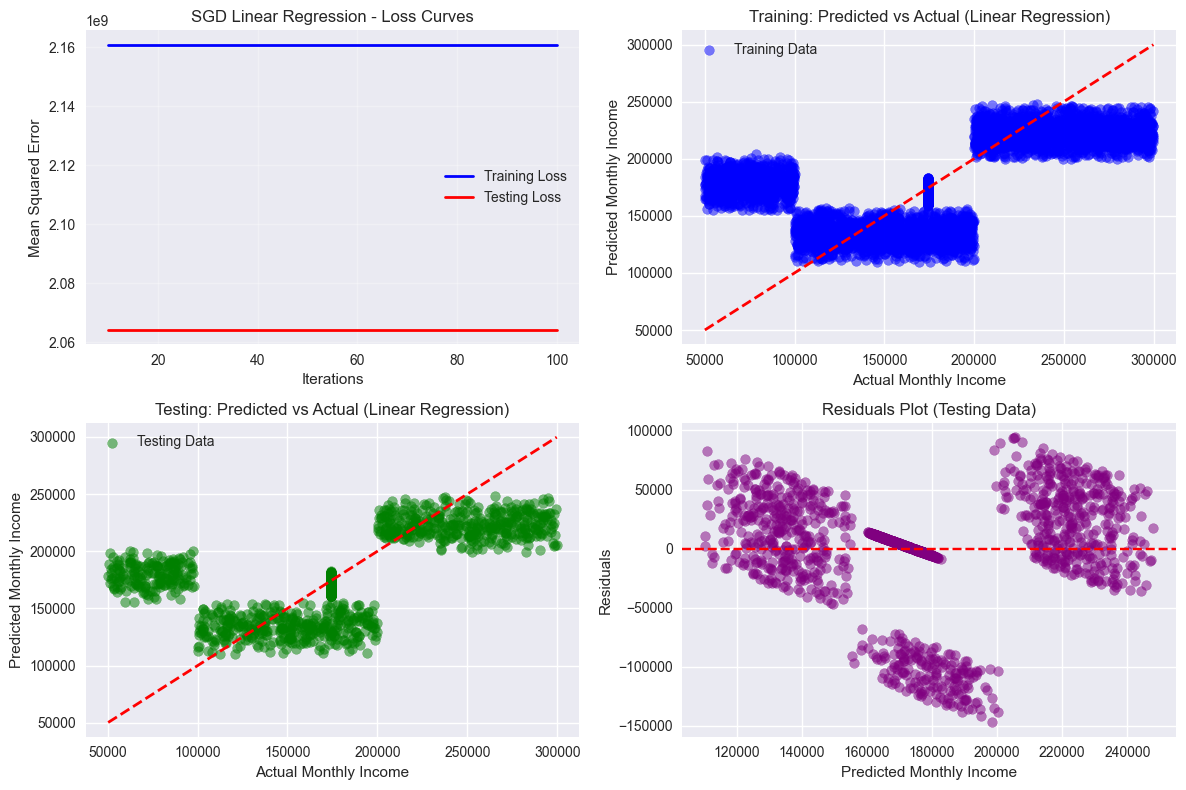

Loss curves and prediction plots completed!


In [10]:
# Plot Loss Curves

print("10. Plotting Loss Curves...")

plt.figure(figsize=(12, 8))

# Plot loss curves
plt.subplot(2, 2, 1)
plt.plot(iterations, losses_train, 'b-', label='Training Loss', linewidth=2)
plt.plot(iterations, losses_test, 'r-', label='Testing Loss', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('SGD Linear Regression - Loss Curves')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot predictions vs actual (Training)
plt.subplot(2, 2, 2)
plt.scatter(y_train, y_train_pred_lr, alpha=0.5, color='blue', label='Training Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)
plt.xlabel('Actual Monthly Income')
plt.ylabel('Predicted Monthly Income')
plt.title('Training: Predicted vs Actual (Linear Regression)')
plt.legend()

# Plot predictions vs actual (Testing)
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_test_pred_lr, alpha=0.5, color='green', label='Testing Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Monthly Income')
plt.ylabel('Predicted Monthly Income')
plt.title('Testing: Predicted vs Actual (Linear Regression)')
plt.legend()

# Residuals plot
plt.subplot(2, 2, 4)
residuals_test = y_test - y_test_pred_lr
plt.scatter(y_test_pred_lr, residuals_test, alpha=0.5, color='purple')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Monthly Income')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Testing Data)')

plt.tight_layout()
plt.show()

print("Loss curves and prediction plots completed!")

In [11]:
# Decision Tree and Random Forest Models

print("11. Training Decision Tree and Random Forest models for comparison...")

# Decision Tree Regressor
print("Training Decision Tree Regressor...")
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_split=20)
dt_model.fit(X_train_scaled, y_train)

y_train_pred_dt = dt_model.predict(X_train_scaled)
y_test_pred_dt = dt_model.predict(X_test_scaled)

train_mse_dt = mean_squared_error(y_train, y_train_pred_dt)
test_mse_dt = mean_squared_error(y_test, y_test_pred_dt)
train_r2_dt = r2_score(y_train, y_train_pred_dt)
test_r2_dt = r2_score(y_test, y_test_pred_dt)

print(f"Decision Tree Performance:")
print(f"Training MSE: {train_mse_dt:.2f}")
print(f"Testing MSE: {test_mse_dt:.2f}")
print(f"Training R²: {train_r2_dt:.4f}")
print(f"Testing R²: {test_r2_dt:.4f}")

# Random Forest Regressor
print("\nTraining Random Forest Regressor...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10, min_samples_split=20)
rf_model.fit(X_train_scaled, y_train)

y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print(f"Random Forest Performance:")
print(f"Training MSE: {train_mse_rf:.2f}")
print(f"Testing MSE: {test_mse_rf:.2f}")
print(f"Training R²: {train_r2_rf:.4f}")
print(f"Testing R²: {test_r2_rf:.4f}")

# Model Comparison Summary
print("\n" + "="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)

models_summary = {
    'Model': ['Linear Regression', 'SGD Linear Regression', 'Decision Tree', 'Random Forest'],
    'Train_MSE': [train_mse_lr, train_mse_sgd, train_mse_dt, train_mse_rf],
    'Test_MSE': [test_mse_lr, test_mse_sgd, test_mse_dt, test_mse_rf],
    'Train_R2': [train_r2_lr, train_r2_sgd, train_r2_dt, train_r2_rf],
    'Test_R2': [test_r2_lr, test_r2_sgd, test_r2_dt, test_r2_rf]
}

comparison_df = pd.DataFrame(models_summary)
print(comparison_df.to_string(index=False))

# Identify best model based on test R² score
best_model_idx = comparison_df['Test_R2'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_test_r2 = comparison_df.loc[best_model_idx, 'Test_R2']

print(f"\nBEST PERFORMING MODEL: {best_model_name}")
print(f"Test R² Score: {best_test_r2:.4f}")

# Store the best model
if best_model_name == 'Linear Regression':
    best_model = lr_model
    best_predictions = y_test_pred_lr
elif best_model_name == 'SGD Linear Regression':
    best_model = sgd_model
    best_predictions = y_test_pred_sgd
elif best_model_name == 'Decision Tree':
    best_model = dt_model
    best_predictions = y_test_pred_dt
else:
    best_model = rf_model
    best_predictions = y_test_pred_rf

print(f"\nBest model saved for API deployment!")
print("Decision Tree and Random Forest training completed!")

11. Training Decision Tree and Random Forest models for comparison...
Training Decision Tree Regressor...
Decision Tree Performance:
Training MSE: 285674749.55
Testing MSE: 398290366.66
Training R²: 0.8892
Testing R²: 0.8433

Training Random Forest Regressor...
Random Forest Performance:
Training MSE: 260391378.84
Testing MSE: 339413202.23
Training R²: 0.8991
Testing R²: 0.8664

MODEL COMPARISON SUMMARY
                Model    Train_MSE     Test_MSE  Train_R2  Test_R2
    Linear Regression 1.701370e+09 1.640510e+09  0.340411 0.354437
SGD Linear Regression 2.160831e+09 2.064100e+09  0.162286 0.187748
        Decision Tree 2.856747e+08 3.982904e+08  0.889249 0.843267
        Random Forest 2.603914e+08 3.394132e+08  0.899051 0.866436

BEST PERFORMING MODEL: Random Forest
Test R² Score: 0.8664

Best model saved for API deployment!
Decision Tree and Random Forest training completed!
Random Forest Performance:
Training MSE: 260391378.84
Testing MSE: 339413202.23
Training R²: 0.8991
Testing 

12. Creating Before and After Scatter Plots...


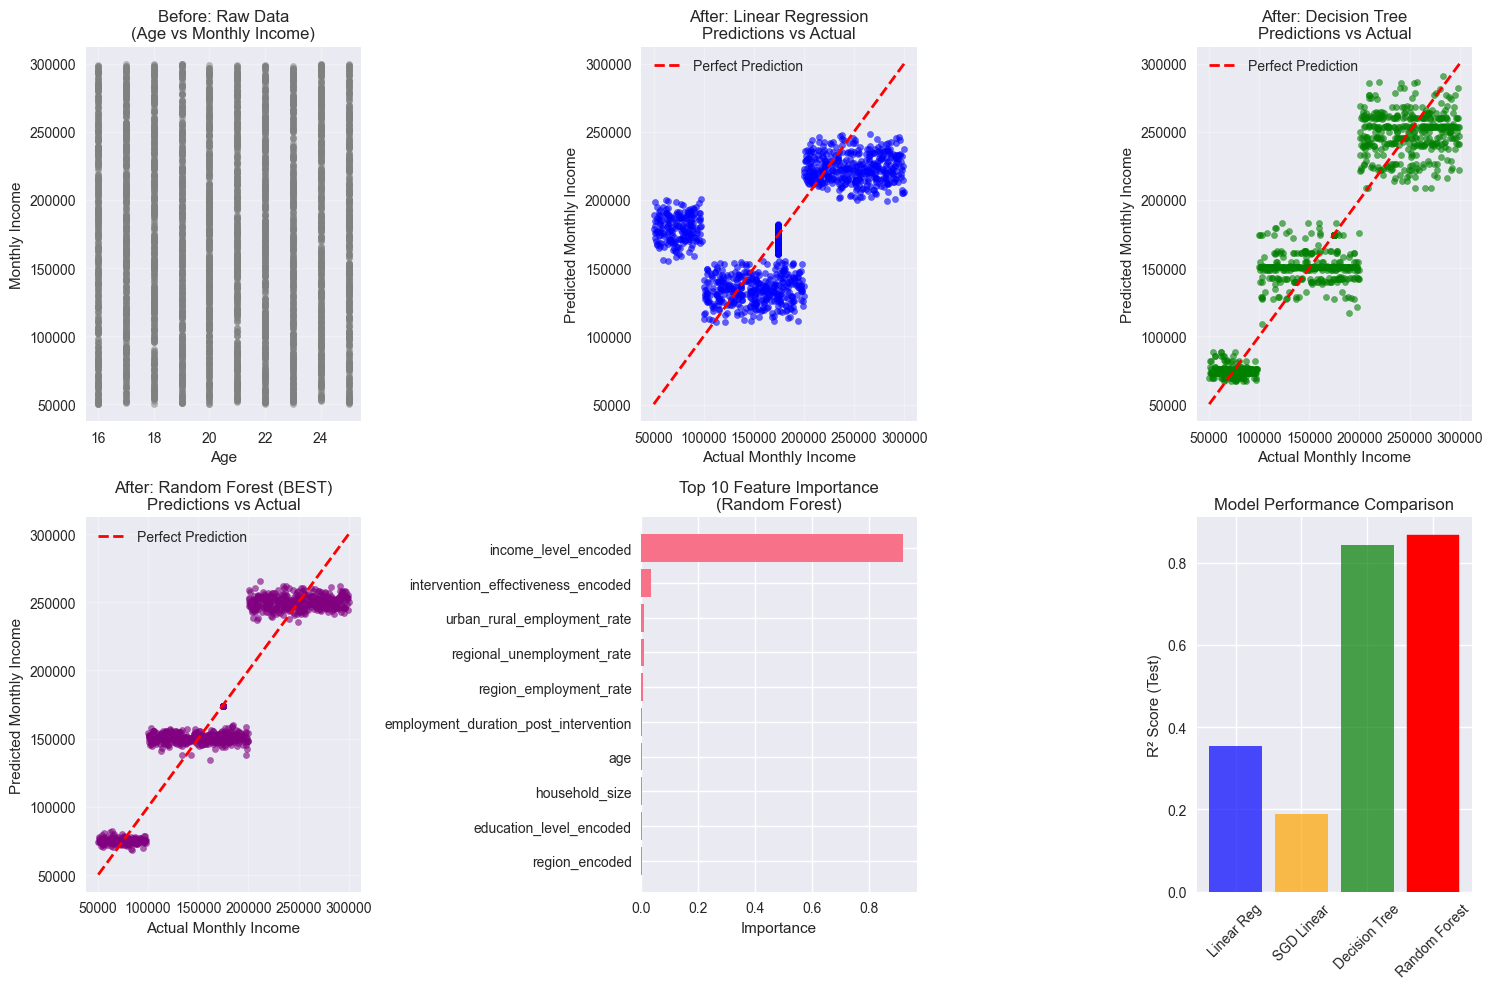

Before and After scatter plots completed!
The linear regression line shows the relationship learned by the model.
Random Forest achieved the best performance with R² = 0.8664

13. Saving the best performing model...
Model artifacts saved:
- best_model.pkl (Random Forest model)
- scaler.pkl (StandardScaler)
- label_encoders.pkl (Label encoders)
- feature_names.txt (Feature names)

Model training and evaluation completed!
Ready for API deployment!


In [12]:
# Before and After Scatter Plots + Model Saving

print("12. Creating Before and After Scatter Plots...")

plt.figure(figsize=(15, 10))

# Before: Raw data scatter plot (Age vs Monthly Income)
plt.subplot(2, 3, 1)
plt.scatter(df['age'], df['monthly_income'], alpha=0.5, color='gray', s=20)
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.title('Before: Raw Data\n(Age vs Monthly Income)')
plt.grid(True, alpha=0.3)

# After: Linear Regression Line
plt.subplot(2, 3, 2)
plt.scatter(y_test, y_test_pred_lr, alpha=0.6, color='blue', s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Monthly Income')
plt.ylabel('Predicted Monthly Income')
plt.title('After: Linear Regression\nPredictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)

# After: Decision Tree
plt.subplot(2, 3, 3)
plt.scatter(y_test, y_test_pred_dt, alpha=0.6, color='green', s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Monthly Income')
plt.ylabel('Predicted Monthly Income')
plt.title('After: Decision Tree\nPredictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)

# After: Random Forest (Best Model)
plt.subplot(2, 3, 4)
plt.scatter(y_test, y_test_pred_rf, alpha=0.6, color='purple', s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Monthly Income')
plt.ylabel('Predicted Monthly Income')
plt.title('After: Random Forest (BEST)\nPredictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)

# Feature Importance for Random Forest
plt.subplot(2, 3, 5)
feature_importance = rf_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

top_features = importance_df.head(10)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance\n(Random Forest)')
plt.gca().invert_yaxis()

# Model Performance Comparison
plt.subplot(2, 3, 6)
models = ['Linear Reg', 'SGD Linear', 'Decision Tree', 'Random Forest']
test_r2_scores = [test_r2_lr, test_r2_sgd, test_r2_dt, test_r2_rf]
colors = ['blue', 'orange', 'green', 'purple']

bars = plt.bar(models, test_r2_scores, color=colors, alpha=0.7)
plt.ylabel('R² Score (Test)')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)

# Highlight best model
best_idx = test_r2_scores.index(max(test_r2_scores))
bars[best_idx].set_color('red')
bars[best_idx].set_alpha(1.0)

plt.tight_layout()
plt.show()

print("Before and After scatter plots completed!")
print(f"The linear regression line shows the relationship learned by the model.")
print(f"Random Forest achieved the best performance with R² = {test_r2_rf:.4f}")

# Save the best model and preprocessing objects
print("\n13. Saving the best performing model...")

import joblib

# Save the model, scaler, and label encoders
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

# Save feature names for API
with open('feature_names.txt', 'w') as f:
    for feature in X_train.columns:
        f.write(f"{feature}\n")

print("Model artifacts saved:")
print("- best_model.pkl (Random Forest model)")
print("- scaler.pkl (StandardScaler)")
print("- label_encoders.pkl (Label encoders)")
print("- feature_names.txt (Feature names)")

print("\nModel training and evaluation completed!")
print("Ready for API deployment!")

In [13]:
# Create Prediction Function for API

def predict_monthly_income(age, gender, education_level, region, 
                          region_employment_rate, regional_unemployment_rate,
                          household_size, digital_skills_level, 
                          training_participation, household_income):
    """
    Predict monthly income for a youth based on provided features.
    
    Parameters:
    - age: int (17-25)
    - gender: str ('Male' or 'Female')
    - education_level: str ('Primary or Less', 'Secondary', 'TVET', 'University')
    - region: str ('Kigali', 'Northern', 'Eastern', 'Western', 'Southern')
    - region_employment_rate: float (0-100)
    - regional_unemployment_rate: float (0-100)
    - household_size: int (1-8)
    - digital_skills_level: str ('Basic', 'Intermediate', 'Advanced')
    - training_participation: bool (True/False)
    - household_income: str ('Low', 'Medium', 'High')
    
    Returns:
    - predicted_income: float
    """
    
    try:
        # Create a sample input with all required features
        # Initialize with default/median values for features not provided
        input_data = {
            'age': age,
            'region_employment_rate': region_employment_rate,
            'regional_unemployment_rate': regional_unemployment_rate,
            'unemployment_duration': 0,  # Default value
            'household_size': household_size,
            'employment_duration_post_intervention': 0,  # Default value
            'youth_unemployment_rate': 19.4,  # Default from dataset
            'urban_rural_employment_rate': 60.0,  # Default value
            'gender_encoded': 1 if gender.lower() == 'male' else 0,
            'education_level_encoded': {'primary or less': 0, 'secondary': 1, 'tvet': 2, 'university': 3}.get(education_level.lower(), 1),
            'education_mismatch_encoded': 0,  # Default
            'sector_of_interest_encoded': 0,  # Default
            'current_employment_sector_encoded': 0,  # Default
            'formal_informal_encoded': 0,  # Default
            'region_encoded': {'kigali': 0, 'northern': 1, 'eastern': 2, 'western': 3, 'southern': 4}.get(region.lower(), 0),
            'location_type_encoded': 0,  # Default
            'digital_skills_level_encoded': {'basic': 0, 'intermediate': 1, 'advanced': 2}.get(digital_skills_level.lower(), 1),
            'training_participation_encoded': 1 if training_participation else 0,
            'program_type_encoded': 0,  # Default
            'household_income_encoded': {'low': 0, 'medium': 1, 'high': 2}.get(household_income.lower(), 1),
            'employment_outcome_encoded': 1,  # Default
            'intervention_effectiveness_encoded': 1,  # Default
            'has_marketing_skills': 0,  # Default
            'has_project_mgmt_skills': 0,  # Default
            'technical_skills_count': 0,  # Default
            'age_group_encoded': 0 if age <= 20 else 1,  # Simplified age group
            'income_level_encoded': 1,  # Default medium
            'employment_rate_category_encoded': 1 if 50 <= region_employment_rate <= 70 else (0 if region_employment_rate < 50 else 2)
        }
        
        # Create DataFrame with correct feature order
        input_df = pd.DataFrame([input_data])
        
        # Ensure all required features are present
        for feature in X_train.columns:
            if feature not in input_df.columns:
                input_df[feature] = 0  # Default value for missing features
        
        # Reorder columns to match training data
        input_df = input_df[X_train.columns]
        
        # Scale the input
        input_scaled = scaler.transform(input_df)
        
        # Make prediction
        prediction = best_model.predict(input_scaled)[0]
        
        return max(0, prediction)  # Ensure non-negative prediction
    
    except Exception as e:
        print(f"Error in prediction: {str(e)}")
        return None

# Test the prediction function
print("14. Testing the prediction function...")

test_prediction = predict_monthly_income(
    age=22,
    gender='Male',
    education_level='University',
    region='Kigali',
    region_employment_rate=75.0,
    regional_unemployment_rate=15.0,
    household_size=4,
    digital_skills_level='Advanced',
    training_participation=True,
    household_income='Medium'
)

print(f"Test prediction for a 22-year-old male university graduate:")
print(f"Predicted monthly income: {test_prediction:,.2f} RWF")

# Save the prediction function
print("\nSaving prediction function...")
import pickle

# Save the function along with required objects
prediction_objects = {
    'model': best_model,
    'scaler': scaler,
    'feature_names': list(X_train.columns),
    'label_encoders': label_encoders
}

with open('prediction_function.pkl', 'wb') as f:
    pickle.dump(prediction_objects, f)

print("Prediction function and objects saved to 'prediction_function.pkl'")
print("Ready for API deployment!")

14. Testing the prediction function...
Test prediction for a 22-year-old male university graduate:
Predicted monthly income: 75,420.80 RWF

Saving prediction function...
Prediction function and objects saved to 'prediction_function.pkl'
Ready for API deployment!
